## Experiment Person 1

1. Person: John Faucett
2. Time to create: approx. 1 hour
3. Questions: 21
4. Time per Question: approx. 2-3 minutes
5. Dataset: v1.0_en

In [45]:
from importlib import reload
import re
import sys
sys.path.append('../')
import libs.stats as stats
import libs.utils as utils
import numpy as np
import pandas as pd
import asag_regex as asag_re
import json
import matplotlib.pyplot as plt
reload(asag_re)

<module 'asag_regex' from '/home/che/Work/research/masters_project/automatic_question_answering/research/notebooks/research_full/paper/01_regex_experiments/asag_regex.py'>

In [23]:
plt.rcParams["figure.figsize"] = (10,8)

In [4]:
# import the data
df = asag_re.read_df('../datasets/asag_v1_en.csv')
display(df.head(3))

# import the user annotated dataset
df_p1 = asag_re.read_df('./results/asag_regex_p1_john.csv')
display(df_p1.head(3))
print('Size: {}'.format(len(df_p1)))

AID  QID                                   Prompt  \
0    1    1  What does a function signature include?   
1    1    1  What does a function signature include?   
2    1    1  What does a function signature include?   

                                        Model Answer  Score  SID  \
0  The name of the function and the types of the ...    4.5    6   
1  The name of the function and the types of the ...    3.0    5   
2  The name of the function and the types of the ...    5.0    8   

                                      Student Answer  
0  It includes the name of the program, the type ...  
1  it includes the specific information about the...  
2  The function signature includes the name of th...

AID  QID                                          Prompt  \
0    1    1         What does a function signature include?   
1    1    2          What is the scope of global variables?   
2    1    3  How does the compiler handle inline functions?   

                                        Model Answer  \
0  The name of the function and the types of the ...   
1                                        File scope.   
2  It makes a copy of the function code in every ...   

                                 Full Credit Matches  \
0  {\n    "name_of_function" : [\n        "names?...   
1  {\n    "file_scope" : [\n        "file",\n    ...   
2  {\n    "copy_function_code" : [\n        "copy...   

                              Partial Credit Matches  
0  {\n    "name_of_function" : [\n        "names?...  
1                                                 {}  
2  {\n    "copy_function_code" : [\n        "cop(...

Size: 21


In [58]:
reload(asag_re)
result = asag_re.evaluate_regex(df, df_p1)

In [38]:
result.keys()

dict_keys(['y_true', 'y_pred', 'y_raw_true', 'y_raw_pred', 'match_info', 'missed_items'])

## Evaluation of Results

Accuracy: 15.714%
Precision: 39.527%
Recall: 15.714%
F1-Measure: 20.211%
Pearson's R: 0.37
Cohen's Kappa: 0.05
RMSE: 3.34
MAE: 2.87
Y-True Mean: 4.03
Y-Pred Mean: 1.25
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.92


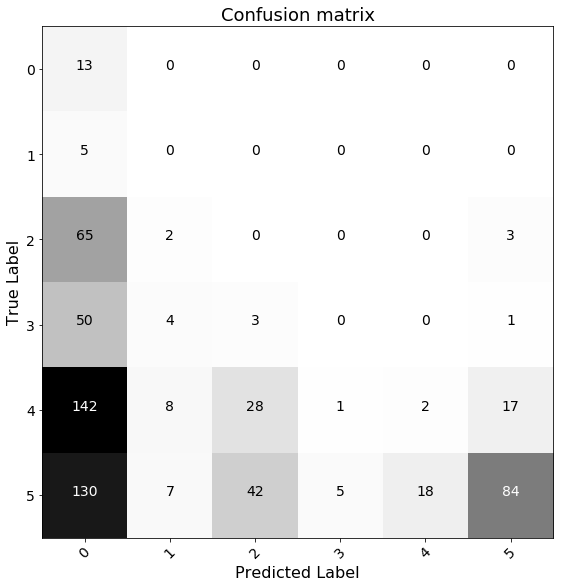

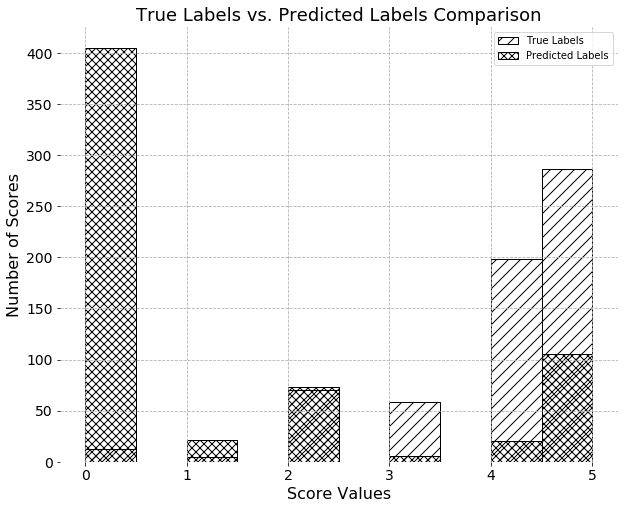

In [39]:
reload(stats)
stats.print_big4(result['y_true'], result['y_pred'])
stats.print_stats(result['y_true'], result['y_pred'])
stats.plot_confusion_matrix(sm.cm(result['y_true'], result['y_pred']), np.arange(6), savefile='./renderings/exp1/e1')
stats.plot_histogram_comparison(result['y_true'], result['y_pred'], bins=10, savefile='./renderings/exp1/e1')

In [40]:
display(np.random.choice(result['missed_items'], 10))

array([197, 349, 562, 115, 227, 542,  50,  28, 137, 338])

In [59]:
indices = [371, 582, 497, 270, 585, 397,  93, 613, 464, 318]

def display_miss(miss, df):
    print('{}.{} [{}].'.format(miss['AID'], miss['QID'], miss['Score']))
    print("PROMPT: {}".format(miss['Prompt']))
    print("RESPONSE: {}".format(miss['Student Answer']))
    fcm = df[np.logical_and(df['AID'] == miss['AID'], df['QID'] == miss['QID'])].iloc[0]['Full Credit Matches']
    pcm = df[np.logical_and(df['AID'] == miss['AID'], df['QID'] == miss['QID'])].iloc[0]['Partial Credit Matches']
    print(fcm)
    print(pcm)
    
for idx in indices[:3]:
    display_miss(df.loc[idx, :], df_p1)


2.6 [5.0].
PROMPT: What is the difference between a function prototype and a function definition?
RESPONSE: A function prototype is a declaration of a function that tells the compiler the function's name, its return type and the types of its parameters.

{
    "function_prototype" : [
        "prototype (includes|has)(.*)function signature",
        "prototype (includes|has)(.*)signature"
    ],
    "function_definition" : [
        "(includes|has|contains)(.*)body of the functions?",
        "(includes|has|contains)(.*)body of functions?",
        "(includes|has|contains)(.*)function body",
        "functions? body"
    ]
}

{}
3.6 [3.0].
PROMPT: Where are variables declared in a C++ program?
RESPONSE: They are usually declared at the beginning before they can be used in the program. They always contain a name and a data type.

{
    "variable_declaration_location" : [
        "anywhere in a program",
        "anywhere",
        "inside(.*)functions?(.*)outside(.*)functions?",
       

In [63]:
hc = 0
for idx in result['hit_items']:
    if df.iloc[idx, :]['Score'] > 0.0:
        display_miss(df.loc[idx, :], df_p1)
    hc += 1
    if hc > 3:
        break


2.4 [1.0].
PROMPT: When does C++ create a default constructor?
RESPONSE: Before the main function of the code.

{
    "default_constructor" : [
        "(if|when) no constructor is (provided|given|defined)"
    ]
}

{}


## Run Evaluation on Pass / Fail


Accuracy: 33.810%
Precision: 86.441%
Recall: 33.810%
F1-Measure: 36.771%
Pearson's R: 0.17
Cohen's Kappa: 0.07
RMSE: 0.81
MAE: 0.66
Y-True Mean: 0.86
Y-Pred Mean: 0.21
Y-True Std Deviation: 0.35
Y-Pred Std Deviation: 0.41


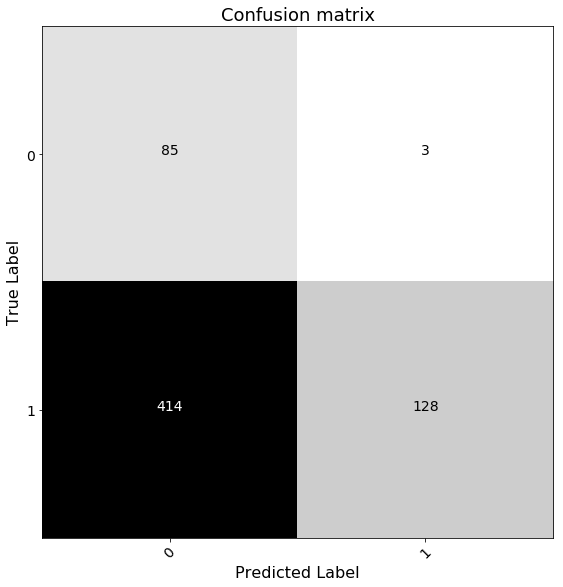

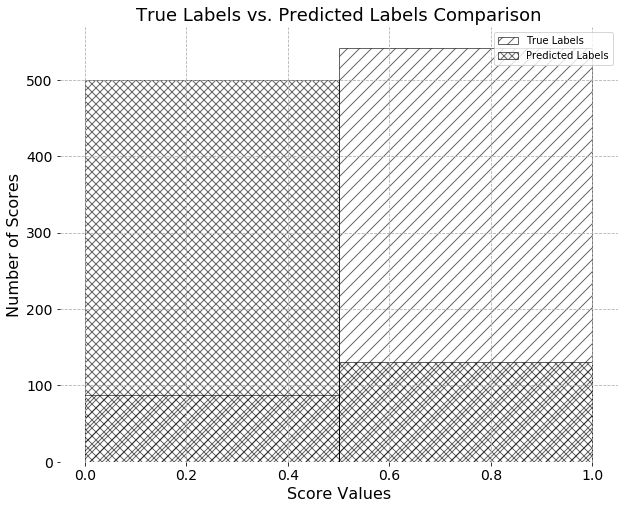

In [69]:
reload(stats)
y_true_pf = utils.convert_to_pass_fail(result['y_true'])
y_pred_pf = utils.convert_to_pass_fail(result['y_pred'])

stats.print_big4(y_true_pf, y_pred_pf)
stats.print_stats(y_true_pf, y_pred_pf)
stats.plot_confusion_matrix(stats.cm(y_true_pf, y_pred_pf), np.arange(2), savefile='./renderings/exp1/e1_pf')
stats.plot_histogram_comparison(y_true_pf, y_pred_pf, bins=2, savefile='./renderings/exp1/e1_pf')

In [74]:
# Where are we missing correct answers?
idxs = np.logical_and(y_true_pf != y_pred_pf, y_true_pf == True)
k = 0
for idx, row in df[idxs].iterrows():
    print('Pred Score: {}'.format(result['y_pred'][idx]))
    display_miss(df.loc[idx, :], df_p1)
    if k >= 5:
        break
    k += 1

Pred Score: 1.0
1.1 [3.0].
PROMPT: What does a function signature include?
RESPONSE: it includes the specific information about the function such as input and output variable types and how many of each.
{
    "name_of_function" : [
        "names? of (function|method)s?",
        "(function|method)s? Name",
        "(function|method)'s name"
    ],
    "types_of_parameters" : [
        "types? of(.*)(parameter|argument)s?",
        "(argument|parameter)s? types?"
    ] 
}
{
    "name_of_function" : [
        "names?",
        "functions?"
    ],
    "types_of_parameters" : [
        "(parameter|argument)s?",
        "(argument|parameter)s?"
    ] 
}
Pred Score: 2.0
1.1 [4.5].
PROMPT: What does a function signature include?
RESPONSE: A function signature consists of the function prototype.  This tells you the general information about a function, its name, parameters, what scope it is in, and other miscellaneous information.
{
    "name_of_function" : [
        "names? of (function|meth